In [1]:
%matplotlib inline

import sys
sys.path.append('../lista3/')

import numpy as np
import matplotlib.pyplot as plt
from problems import rastrigin, schwefel, griewank, ackeley, sphere
from problems import rastrigin_init, schwefel_init, griewank_init, ackeley_init, sphere_init
from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def mutate(parents, tau, tau0):
    d = int(parents.shape[1] / 2)
    M = parents.shape[0]
    
    eps = np.random.normal(scale=tau, size=(M, d))
    eps0 = np.random.normal(scale=tau0, size=(M, 1))
    new_sigmas = parents[:, d:] * np.exp(eps + eps0)
    eps = np.random.normal(scale=new_sigmas)
    new_xs = parents[:, :d] + eps
    
    return np.hstack([new_xs, new_sigmas])

def es_plus(d, F, N, M, k, num_iter, init_fn, init_std=1, logging=False, log_interval=1, roulette=False, cx=False,
            mutation=mutate):
    
    X = init_fn(d, N)
    S = np.ones((N,d), dtype=np.float32) * init_std
    P = np.hstack([X, S])
    
    tau = k / np.sqrt(2 * d)
    tau0 = k / np.sqrt(2 * np.sqrt(d))

    score = F(X)
    scores = []
    sigmas = []
    
    for i in xrange(num_iter):
        
        sigmas.append(P[:, d:].mean(axis=0))
        
        if logging and not i % log_interval:
            print 'Starting iteration {} out of {}...'.format(i + 1, num_iter)

        scores.append(np.array([score.min(), score.mean(), score.max()]))
        
        if logging and not i % log_interval:
            print 'Current population stats: \t{:.10f}, \t{:.10f}, \t{:.10f}'.format(*scores[-1])
            
        if not roulette:
            parents = P[score.argpartition(-M)[-M:]]
        else:
            score_positive = score - score.min()
            parent_probs = score_positive / score_positive.sum()
            #if logging and not i % log_interval:
            #    print parent_probs
            parents = P[np.random.choice(N, p=parent_probs, size=M)]
            
            if cx:
                parents2 = P[np.random.choice(N, p=parent_probs, size=M)]
                parents = np.concatenate([parents[:, np.newaxis], parents2[:, np.newaxis]], axis=1).mean(axis=1)
            
        children = mutation(parents, tau, tau0)
        
        P = np.vstack([P, children])
        score = F(P[:, :d])
        best = score.argpartition(-N)[-N:]
        P = P[best]
        score = score[best]
        
    return P[np.argmax(score)][:d], np.vstack(scores), np.vstack(sigmas)

In [3]:
def plot_pop(log):
    plt.figure(figsize=(15,8))
    plt.plot(xrange(len(log)), log)
    plt.show()

In [4]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [5]:
# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

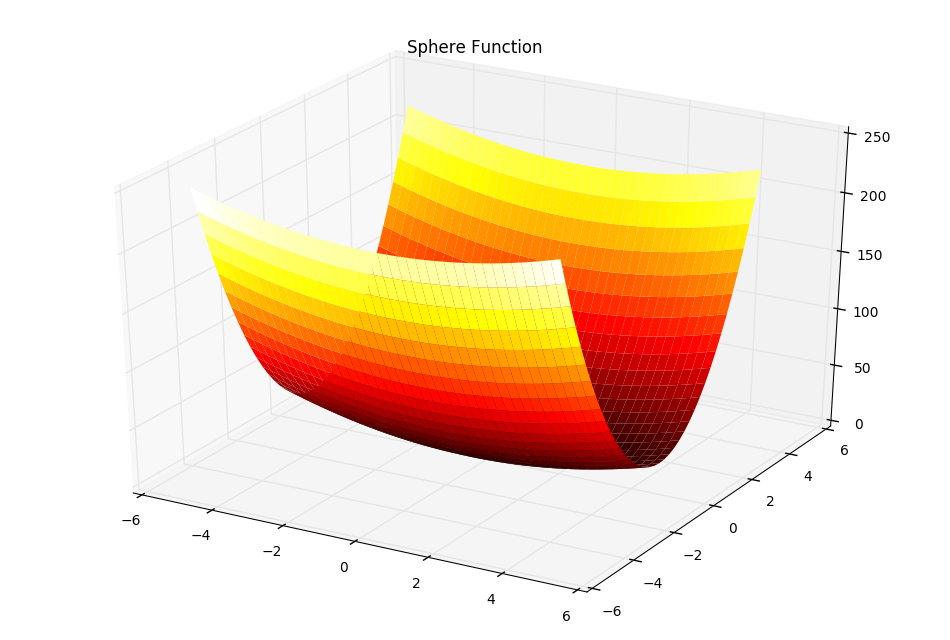

In [9]:
plot_3D_benchmark_function(objective_function_F1a, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

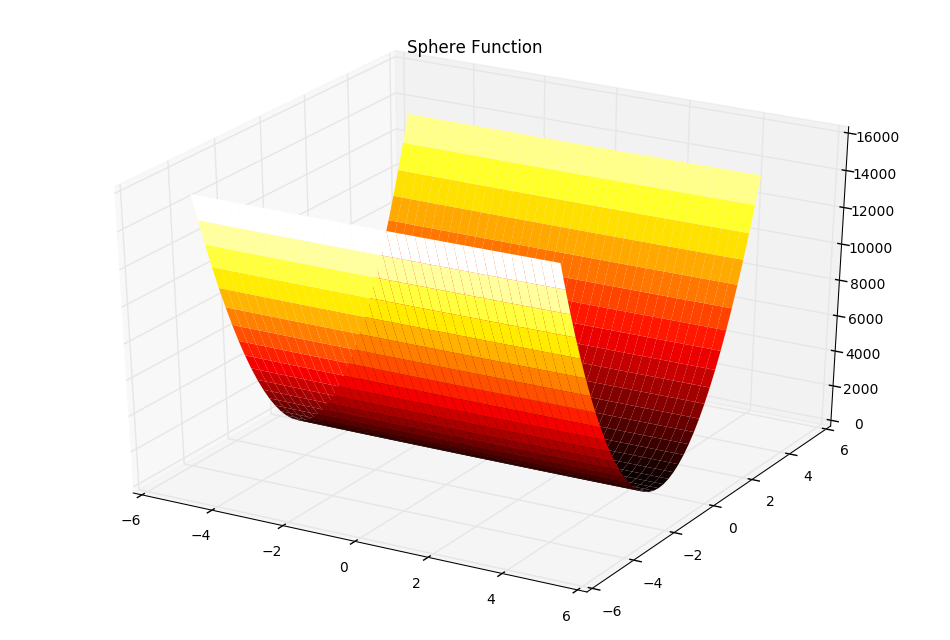

In [10]:
plot_3D_benchmark_function(objective_function_F1b, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

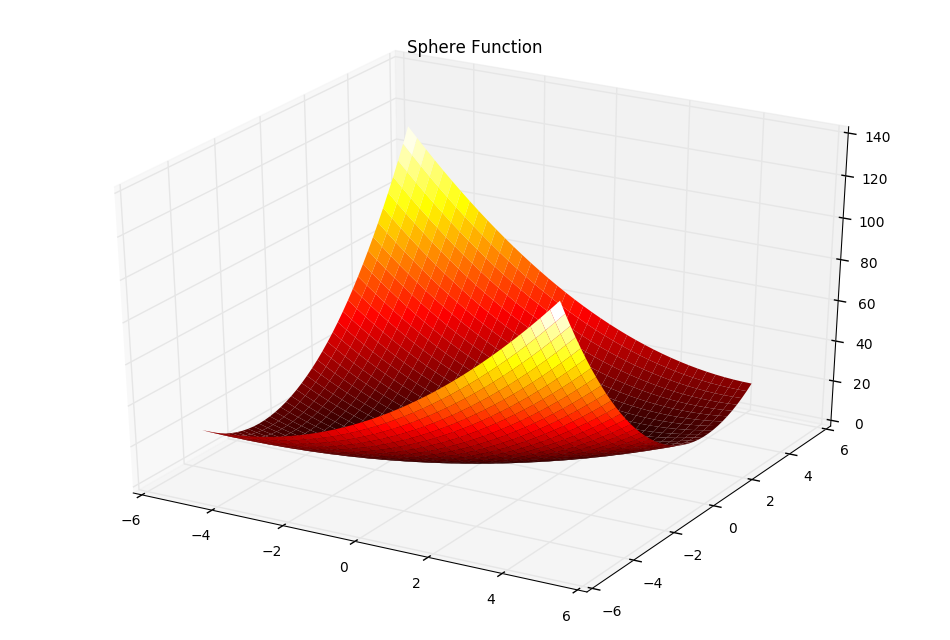

In [11]:
plot_3D_benchmark_function(objective_function_F1c, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

# Obliczenia

Starting iteration 1 out of 200...
Current population stats: 	-222.2683779931, 	-100.0945598633, 	-3.3342571506
Starting iteration 11 out of 200...
Current population stats: 	-0.0000043748, 	-0.0000025554, 	-0.0000001933
Starting iteration 21 out of 200...
Current population stats: 	-0.0000020995, 	-0.0000010420, 	-0.0000001596
Starting iteration 31 out of 200...
Current population stats: 	-0.0000008301, 	-0.0000004689, 	-0.0000000081
Starting iteration 41 out of 200...
Current population stats: 	-0.0000006689, 	-0.0000003769, 	-0.0000000081
Starting iteration 51 out of 200...
Current population stats: 	-0.0000004921, 	-0.0000002541, 	-0.0000000081
Starting iteration 61 out of 200...
Current population stats: 	-0.0000003801, 	-0.0000002096, 	-0.0000000081
Starting iteration 71 out of 200...
Current population stats: 	-0.0000003032, 	-0.0000001654, 	-0.0000000081
Starting iteration 81 out of 200...
Current population stats: 	-0.0000002695, 	-0.0000001461, 	-0.0000000081
Starting iterati

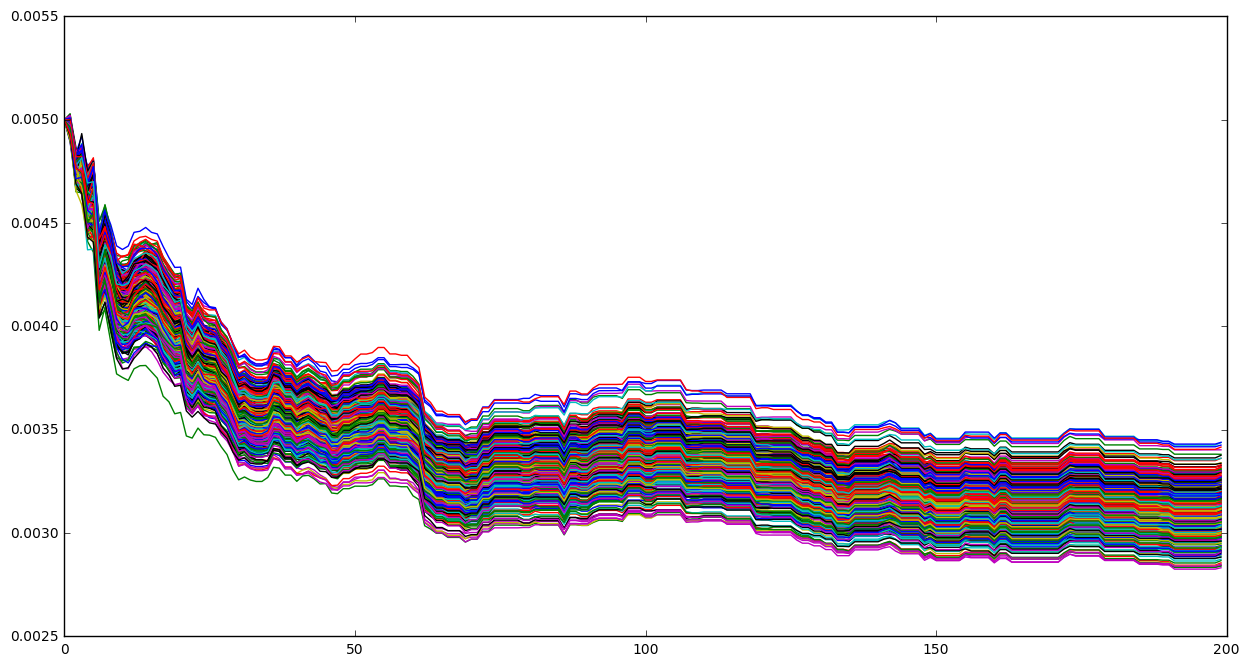

In [21]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1a, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-16208.1054580640, 	-6099.9129789966, 	-6.4656448989
Starting iteration 11 out of 200...
Current population stats: 	-0.0001339456, 	-0.0000606373, 	-0.0000015488
Starting iteration 21 out of 200...
Current population stats: 	-0.0000215308, 	-0.0000109148, 	-0.0000005560
Starting iteration 31 out of 200...
Current population stats: 	-0.0000075571, 	-0.0000029506, 	-0.0000004828
Starting iteration 41 out of 200...
Current population stats: 	-0.0000046709, 	-0.0000023955, 	-0.0000002609
Starting iteration 51 out of 200...
Current population stats: 	-0.0000034218, 	-0.0000019236, 	-0.0000002609
Starting iteration 61 out of 200...
Current population stats: 	-0.0000028652, 	-0.0000016685, 	-0.0000002609
Starting iteration 71 out of 200...
Current population stats: 	-0.0000025966, 	-0.0000015873, 	-0.0000002609
Starting iteration 81 out of 200...
Current population stats: 	-0.0000023426, 	-0.0000014618, 	-0.0000002609
Starting iter

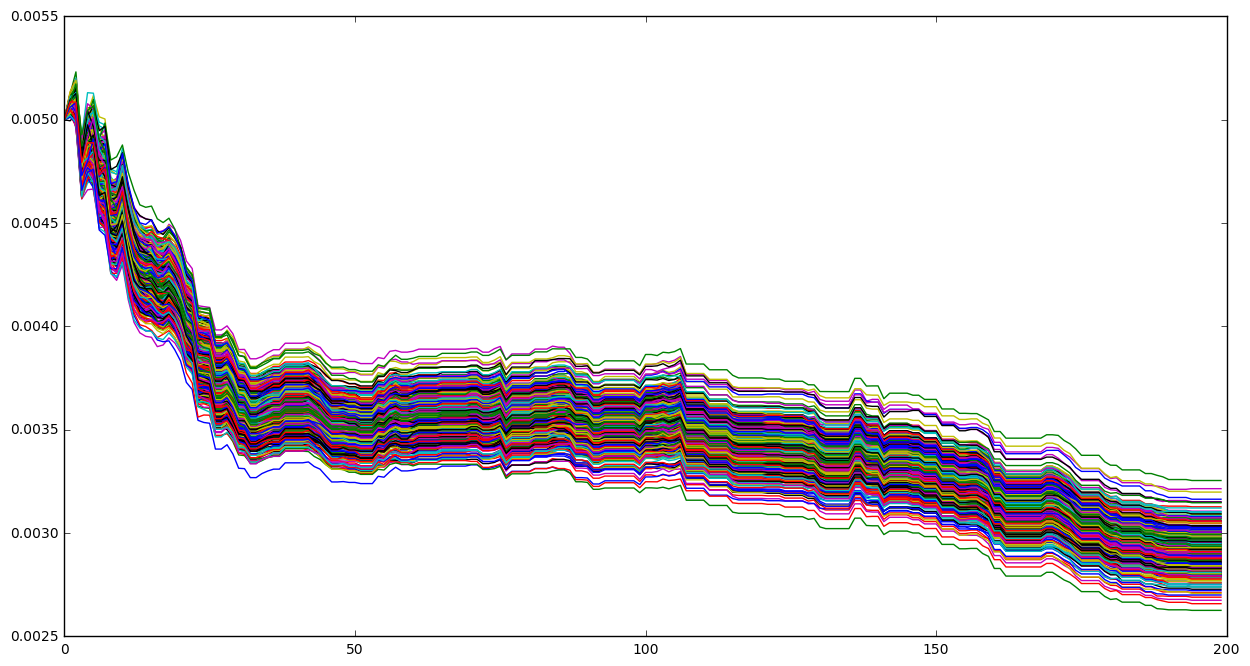

In [20]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1b, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-102.5905000359, 	-30.9731328920, 	-0.1133236972
Starting iteration 11 out of 200...
Current population stats: 	-0.0000025084, 	-0.0000011776, 	-0.0000000151
Starting iteration 21 out of 200...
Current population stats: 	-0.0000007456, 	-0.0000003434, 	-0.0000000008
Starting iteration 31 out of 200...
Current population stats: 	-0.0000004433, 	-0.0000001767, 	-0.0000000008
Starting iteration 41 out of 200...
Current population stats: 	-0.0000001988, 	-0.0000000801, 	-0.0000000008
Starting iteration 51 out of 200...
Current population stats: 	-0.0000001192, 	-0.0000000624, 	-0.0000000008
Starting iteration 61 out of 200...
Current population stats: 	-0.0000001023, 	-0.0000000511, 	-0.0000000008
Starting iteration 71 out of 200...
Current population stats: 	-0.0000000904, 	-0.0000000420, 	-0.0000000008
Starting iteration 81 out of 200...
Current population stats: 	-0.0000000777, 	-0.0000000388, 	-0.0000000008
Starting iteratio

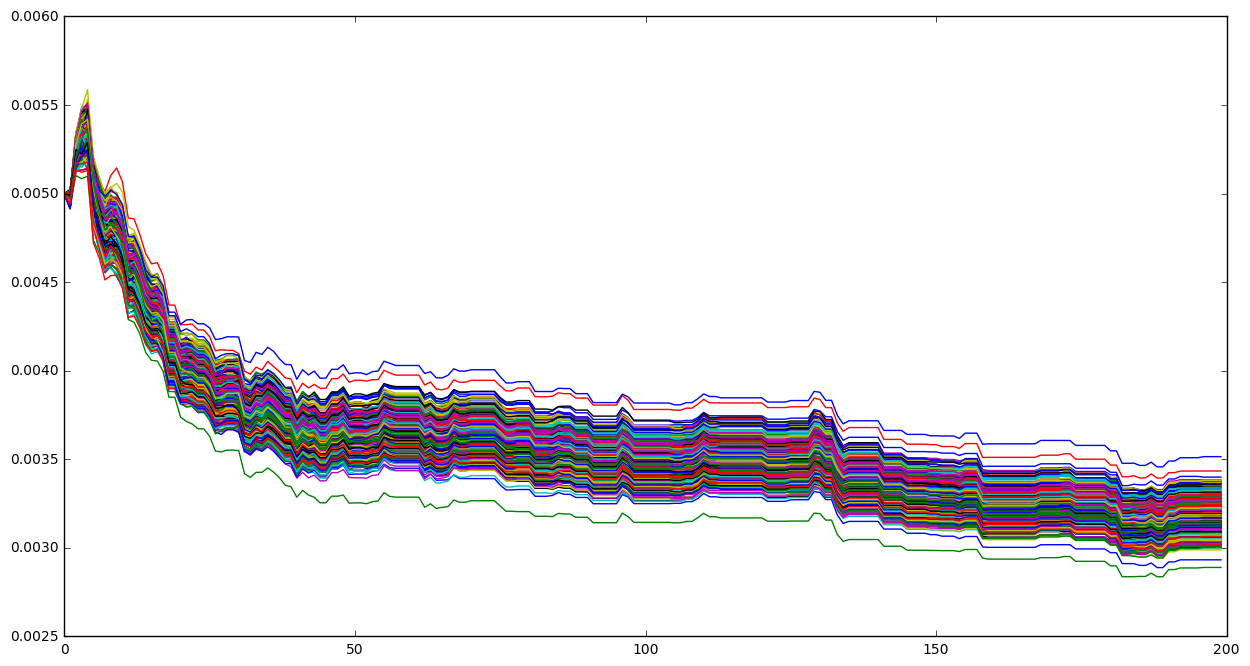

In [19]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1c, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

# Simple mutation

In [9]:
# wszystkie sigmy dla danego osobnika równe, update tylko za pomocą exp(N(0,tau0))

def mutate1(parents, tau, tau0):
    d = int(parents.shape[1] / 2)
    M = parents.shape[0]
    
    eps = 0#np.random.normal(scale=tau, size=(M, 1))
    eps0 = np.random.normal(scale=tau0, size=(M, 1))
    new_sigmas = parents[:, d:] * np.exp(eps + eps0)
    eps = np.random.normal(scale=new_sigmas)
    new_xs = parents[:, :d] + eps
    
    return np.hstack([new_xs, new_sigmas])

Starting iteration 1 out of 200...
Current population stats: 	-221.7632738703, 	-81.0886061429, 	-0.5866504448
Starting iteration 11 out of 200...
Current population stats: 	-0.0000069583, 	-0.0000038399, 	-0.0000004131
Starting iteration 21 out of 200...
Current population stats: 	-0.0000024463, 	-0.0000012557, 	-0.0000000003
Starting iteration 31 out of 200...
Current population stats: 	-0.0000015165, 	-0.0000007745, 	-0.0000000003
Starting iteration 41 out of 200...
Current population stats: 	-0.0000009491, 	-0.0000005023, 	-0.0000000003
Starting iteration 51 out of 200...
Current population stats: 	-0.0000006529, 	-0.0000003574, 	-0.0000000003
Starting iteration 61 out of 200...
Current population stats: 	-0.0000004379, 	-0.0000002407, 	-0.0000000003
Starting iteration 71 out of 200...
Current population stats: 	-0.0000003603, 	-0.0000001880, 	-0.0000000003
Starting iteration 81 out of 200...
Current population stats: 	-0.0000003246, 	-0.0000001674, 	-0.0000000003
Starting iteratio

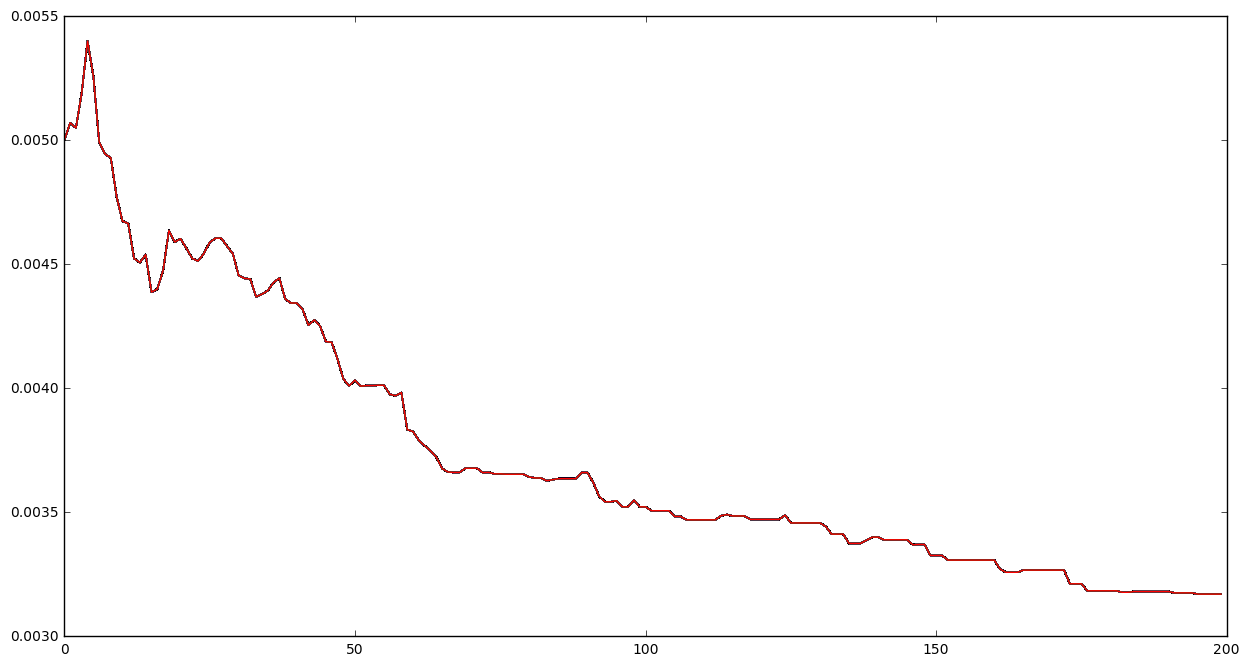

In [11]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1a, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True, mutation=mutate1)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-14600.3798212061, 	-4895.3204130254, 	-23.4884911854
Starting iteration 11 out of 200...
Current population stats: 	-0.0000901982, 	-0.0000375229, 	-0.0000001472
Starting iteration 21 out of 200...
Current population stats: 	-0.0000159600, 	-0.0000087131, 	-0.0000001472
Starting iteration 31 out of 200...
Current population stats: 	-0.0000106441, 	-0.0000054855, 	-0.0000001472
Starting iteration 41 out of 200...
Current population stats: 	-0.0000083617, 	-0.0000039012, 	-0.0000001454
Starting iteration 51 out of 200...
Current population stats: 	-0.0000055765, 	-0.0000024065, 	-0.0000001454
Starting iteration 61 out of 200...
Current population stats: 	-0.0000033898, 	-0.0000017605, 	-0.0000001454
Starting iteration 71 out of 200...
Current population stats: 	-0.0000029808, 	-0.0000015152, 	-0.0000001454
Starting iteration 81 out of 200...
Current population stats: 	-0.0000026871, 	-0.0000012884, 	-0.0000000612
Starting ite

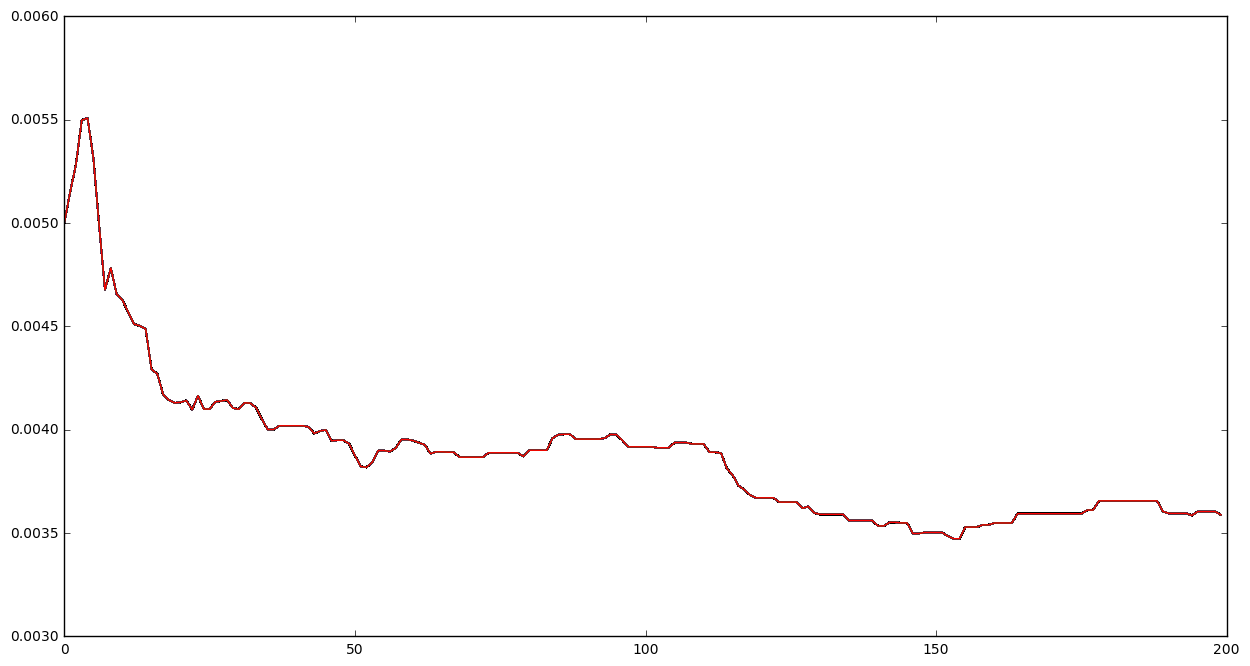

In [15]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1b, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True, mutation=mutate1)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-120.0247178045, 	-33.9074746371, 	-0.8616653346
Starting iteration 11 out of 200...
Current population stats: 	-0.0000015367, 	-0.0000007130, 	-0.0000000027
Starting iteration 21 out of 200...
Current population stats: 	-0.0000004017, 	-0.0000002090, 	-0.0000000016
Starting iteration 31 out of 200...
Current population stats: 	-0.0000002525, 	-0.0000001213, 	-0.0000000016
Starting iteration 41 out of 200...
Current population stats: 	-0.0000001477, 	-0.0000000804, 	-0.0000000016
Starting iteration 51 out of 200...
Current population stats: 	-0.0000001257, 	-0.0000000695, 	-0.0000000016
Starting iteration 61 out of 200...
Current population stats: 	-0.0000001090, 	-0.0000000581, 	-0.0000000014
Starting iteration 71 out of 200...
Current population stats: 	-0.0000000966, 	-0.0000000532, 	-0.0000000014
Starting iteration 81 out of 200...
Current population stats: 	-0.0000000842, 	-0.0000000446, 	-0.0000000014
Starting iteratio

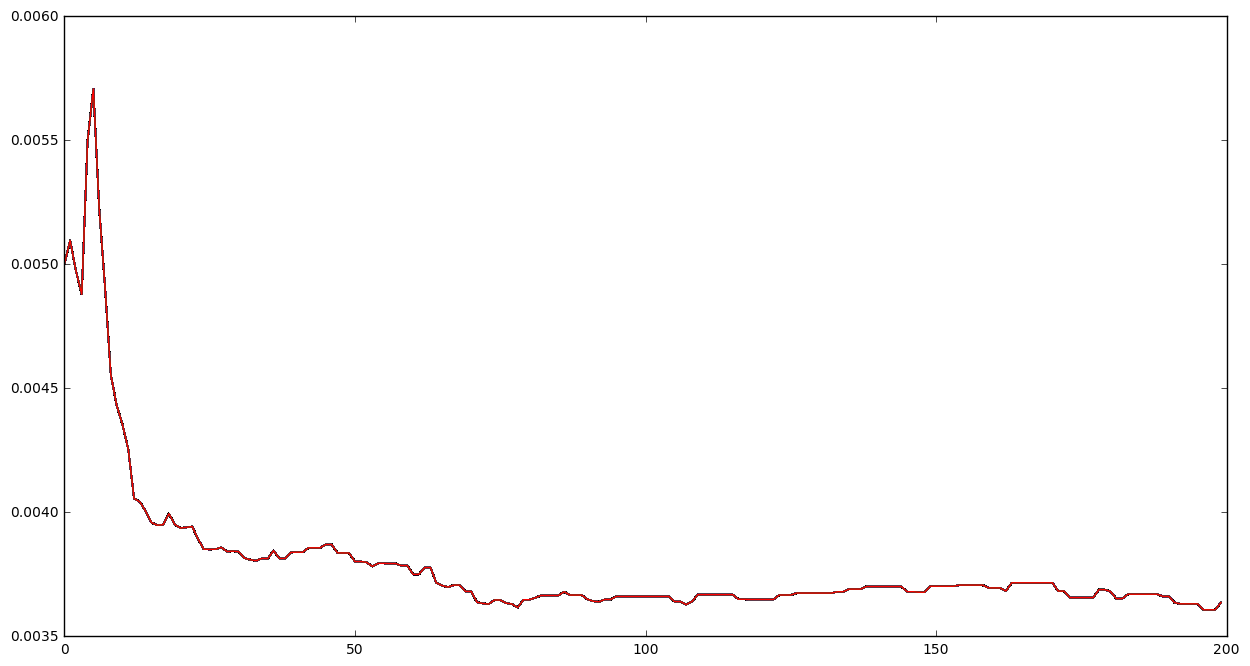

In [18]:
t0 = time()
sol, log, sig = es_plus(500, objective_function_F1c, 50, 200, 1, 200, sphere_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True, mutation=mutate1)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-2096.3628432842, 	-1515.3170277409, 	-907.4448625882
Starting iteration 11 out of 200...
Current population stats: 	-2.0481252154, 	-1.9738304184, 	-1.7234793040
Starting iteration 21 out of 200...
Current population stats: 	-1.1340259156, 	-1.1255645881, 	-1.0888305712
Starting iteration 31 out of 200...
Current population stats: 	-0.9059378470, 	-0.8843233867, 	-0.7928359736
Starting iteration 41 out of 200...
Current population stats: 	-0.3998237784, 	-0.3871299905, 	-0.3416844666
Starting iteration 51 out of 200...
Current population stats: 	-0.1889353268, 	-0.1835449986, 	-0.1671580391
Starting iteration 61 out of 200...
Current population stats: 	-0.0931853572, 	-0.0908504841, 	-0.0824167841
Starting iteration 71 out of 200...
Current population stats: 	-0.0463800017, 	-0.0451357476, 	-0.0401372239
Starting iteration 81 out of 200...
Current population stats: 	-0.0232768789, 	-0.0226770799, 	-0.0204705884
Starting ite

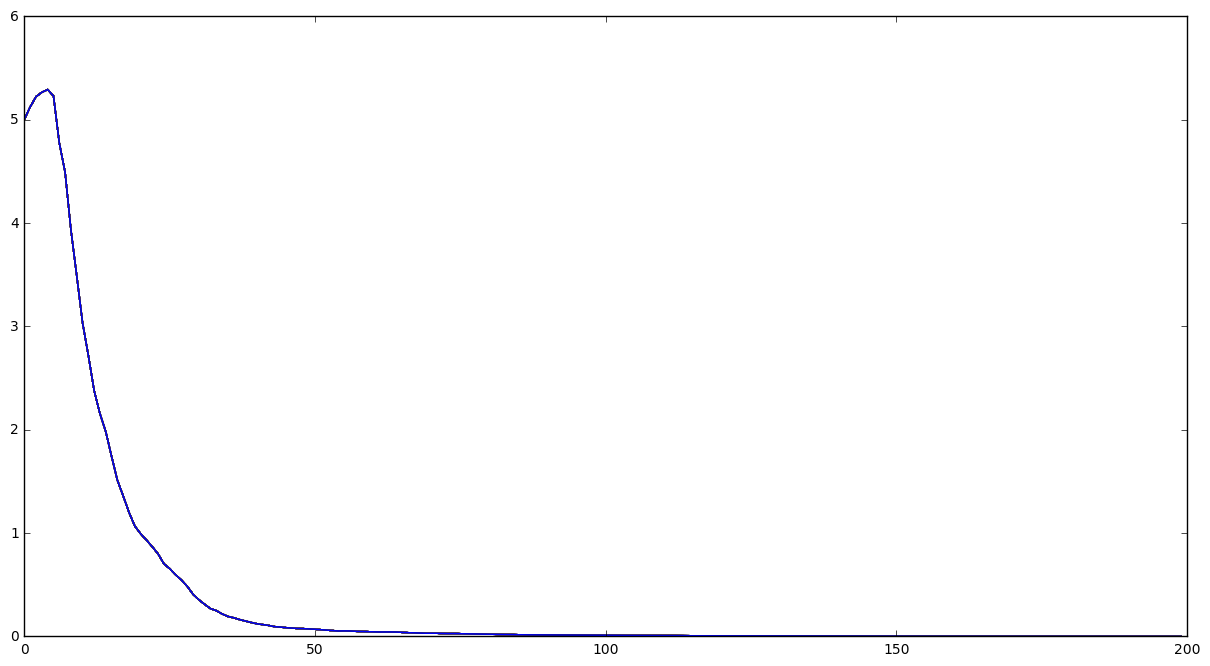

In [19]:
t0 = time()
sol, log, sig = es_plus(50, griewank, 500, 2000, 1, 200, griewank_init,
                        logging=True, log_interval=10, init_std=5.005, roulette=True, cx=True, mutation=mutate1)
print '\n', time() - t0, '\n\n'
plot_pop(sig)

Starting iteration 1 out of 200...
Current population stats: 	-2216.4612409918, 	-1853.7338910665, 	-1490.3700258325
Starting iteration 11 out of 200...
Current population stats: 	-135.5395588405, 	-128.1740748501, 	-101.9496450116
Starting iteration 21 out of 200...
Current population stats: 	-43.3382976671, 	-42.1917340722, 	-36.7880332162
Starting iteration 31 out of 200...
Current population stats: 	-19.9975612145, 	-19.3458859507, 	-16.6616371708
Starting iteration 41 out of 200...
Current population stats: 	-8.2234598514, 	-7.9310295145, 	-6.4765644421
Starting iteration 51 out of 200...
Current population stats: 	-3.2854833108, 	-3.1779378321, 	-2.6368318898
Starting iteration 61 out of 200...
Current population stats: 	-1.3646452351, 	-1.3180919436, 	-1.0907930810
Starting iteration 71 out of 200...
Current population stats: 	-0.5442405158, 	-0.5249308732, 	-0.4347121744
Starting iteration 81 out of 200...
Current population stats: 	-0.2208027306, 	-0.2132126192, 	-0.1787983308

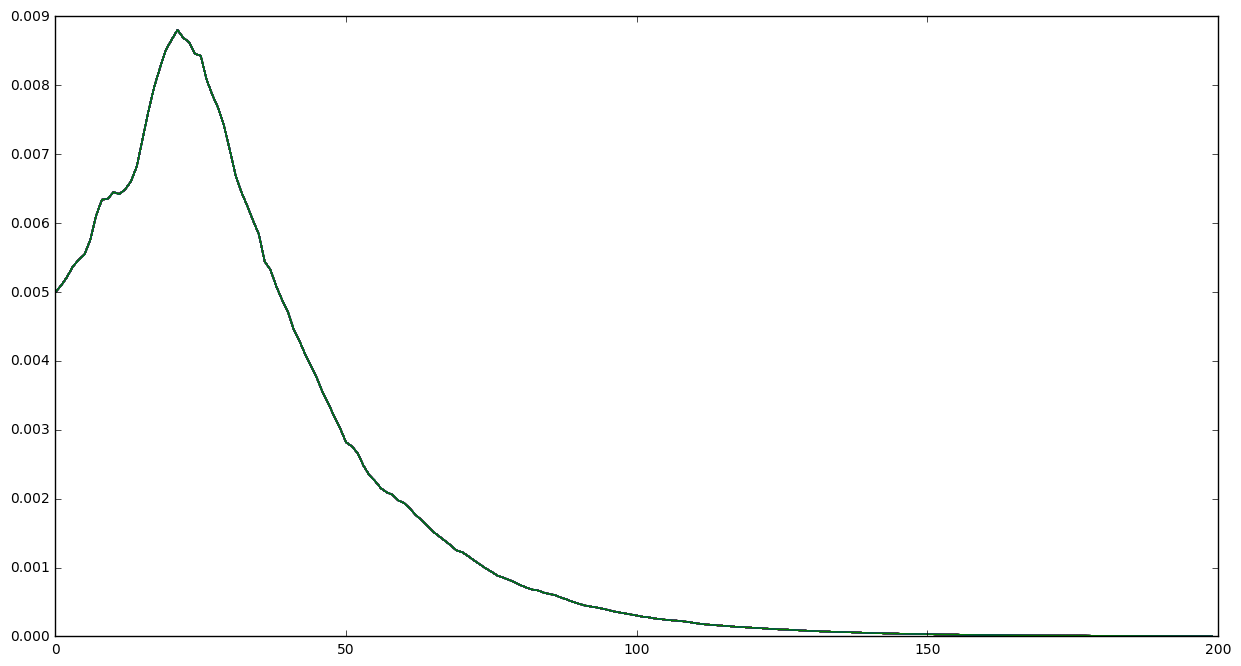

In [20]:
t0 = time()
sol, log, sig = es_plus(100, rastrigin, 2000, 6000, 1, 200, rastrigin_init,
                        logging=True, log_interval=10, init_std=.005, roulette=True, cx=True, mutation=mutate1)
print '\n', time() - t0, '\n\n'
plot_pop(sig)